# Import Dependencies

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.models as models
import numpy as np
import os
from tqdm import tqdm

# Loading pre trained model of VGG16

In [ ]:
VGG = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 109MB/s]


# Extract information about fully connected layers

In [ ]:
# Access the fully connected layers
fc1 = VGG.classifier[0]
fc2 = VGG.classifier[3]
fc3 = VGG.classifier[6]

# Extract the weight matrices
fc1_weights = fc1.weight.detach().numpy()
fc2_weights = fc2.weight.detach().numpy()
fc3_weights = fc3.weight.detach().numpy()

print(fc1_weights.shape)
print("Mean1 "+ str(np.mean(fc1_weights)))
print("Var1 " + str(np.var(fc1_weights)))
print("Max1 " + str(np.max(fc1_weights)) + " Min1 " + str(np.min(fc1_weights)))
print("")

print(fc2_weights.shape)
print("Mean2 "+ str(np.mean(fc2_weights)))
print("Var2 " + str(np.var(fc2_weights)))
print("Max2 " + str(np.max(fc2_weights)) + " Min2 " + str(np.min(np.abs(fc2_weights))))
print(str(np.count_nonzero(fc2_weights[ np.where( fc2_weights >= np.mean(fc2_weights)-0.002 ) ]))+" out of " +str(4096*4096))
print("")

print(fc3_weights.shape)
print("Mean3 "+ str(np.mean(fc3_weights)))
print("Var3 " + str(np.var(fc3_weights)))
print("Max3 " + str(np.max(fc3_weights)) + " Min3 " + str(np.min(fc3_weights)))

(4096, 25088)
Mean1 -0.0002987648
Var1 2.5433777e-05
Max1 0.061661966 Min1 -0.043244604

(4096, 4096)
Mean2 -0.0010190236
Var2 9.9508936e-05
Max2 0.060862012 Min2 9.263146e-10
9609029 out of 16777216

(1000, 4096)
Mean3 -8.191522e-07
Var3 0.0003409991
Max3 0.13061406 Min3 -0.08195919


In [ ]:
dimensions = [fc1_weights.shape[1],fc1_weights.shape[0],fc2_weights.shape[1],fc2_weights.shape[0],fc3_weights.shape[1],fc3_weights.shape[0]]
print(dimensions)
weights_distributions = [np.mean(fc1_weights),np.std(fc1_weights),np.mean(fc2_weights),np.std(fc2_weights),np.mean(fc3_weights),np.std(fc3_weights)]
print(weights_distributions)

if not os.path.isdir('./output/'):
    os.makedirs('./output')

np.save("./output/vgg_dimensions.npy", dimensions)
np.save("./output/vgg_weights_distribution.npy", weights_distributions)

[25088, 4096, 4096, 4096, 4096, 1000]
[-0.0002987648, 0.0050431914, -0.0010190236, 0.009975417, -8.191522e-07, 0.018466162]


# Plot histograms of discretized weights values

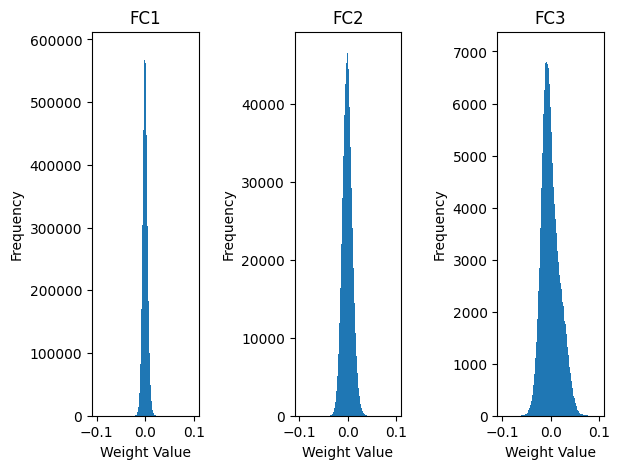

In [ ]:
# Assuming fc1_weights is already defined as in your previous code
plt.subplot(1, 3, 1)
plt.hist(fc1_weights.flatten(), bins=3000, range=(-0.10, 0.10))
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.title("FC1")

# Assuming fc2_weights is already defined as in your previous code
plt.subplot(1, 3, 2)
plt.hist(fc2_weights.flatten(), bins=3000, range=(-0.10, 0.10))
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.title("FC2")

# Assuming fc3_weights is already defined as in your previous code
plt.subplot(1, 3, 3)
plt.hist(fc3_weights.flatten(), bins=3000, range=(-0.10, 0.10))
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.title("FC3")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.9,
                    hspace=0.9)
plt.show()

# Load the CINIC-10 dataset

In [ ]:
!wget https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz
!tar -xzvf CINIC-10.tar.gz

Streaming output truncated to the last 5000 lines.
valid/truck/n03896419_1446.png
valid/truck/n03796401_4733.png
valid/truck/n03796401_478.png
valid/truck/n03796401_4815.png
valid/truck/n03796401_4868.png
valid/truck/n03796401_492.png
valid/truck/n03796401_5035.png
valid/truck/n03796401_5053.png
valid/truck/n03796401_5071.png
valid/truck/n03796401_5116.png
valid/truck/n03796401_5310.png
valid/truck/n03796401_5323.png
valid/truck/n03796401_5338.png
valid/truck/n03796401_5357.png
valid/truck/n03796401_5376.png
valid/truck/n03796401_538.png
valid/truck/n03796401_5729.png
valid/truck/n03796401_5736.png
valid/truck/n03796401_5843.png
valid/truck/n03796401_6098.png
valid/truck/n03796401_6228.png
valid/truck/n03796401_6402.png
valid/truck/n03796401_6410.png
valid/truck/n03796401_6453.png
valid/truck/n03796401_6503.png
valid/truck/n03796401_6531.png
valid/truck/n03796401_6574.png
valid/truck/n03796401_6727.png
valid/truck/n03796401_6763.png
valid/truck/n03796401_6772.png
valid/truck/n03796401_

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the transformations for the data
transform = transforms.Compose([
    transforms.Resize(256),  # Resize the image to 256x256
    transforms.CenterCrop(224),  # Crop the image to 224x224
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize the image
])


# Load the CINIC-10 dataset
train_dataset = datasets.ImageFolder(root='./train', transform=transform)
test_dataset = datasets.ImageFolder(root='./test', transform=transform)
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Now you can use train_loader and test_loader to iterate through the dataset
# Example:
for images, labels in train_loader:
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    break

Image batch shape: torch.Size([64, 3, 224, 224])
Label batch shape: torch.Size([64])


# Evaluate with the CINIC-10 dataset ang compute average gradient for the edges

In [ ]:
# Initialize a list to store gradients
fc1_avg_gradients = []
fc2_avg_gradients = []
fc3_avg_gradients = []
#gradients = []

# Set the device to cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set the device globally
torch.set_default_device(device)

# Iterate through the first 30 images in the test dataset containing 1407 images

for i, (images, labels) in enumerate(tqdm(test_loader)):
    if i%70 != 0:
      continue

    images.requires_grad_(True) # Enable gradient calculation for the image input

    # Perform the forward pass
    outputs = VGG(images)

    # Choose a class to calculate the gradient with respect to
    target_class = labels[0]  # Using the actual label

    # Calculate the gradient of the output with respect to the image
    loss = outputs[0, target_class]  # loss is the output score for the target class
    loss.backward()

    fc1_avg_gradients.append(fc1.weight.grad.data.numpy())
    fc2_avg_gradients.append(fc2.weight.grad.data.numpy())
    fc3_avg_gradients.append(fc3.weight.grad.data.numpy())
    # print("Processed image",(i/70)+1,"/30","Target class:",target_class)
    #gradient = images.grad.data.numpy()
    #gradients.append(gradient)

#average_gradient = np.mean(np.array(gradients), axis = 0)
fc1_avg_gradients = np.mean(np.array(fc1_avg_gradients), axis=0)
fc2_avg_gradients = np.mean(np.array(fc2_avg_gradients), axis=0)
fc3_avg_gradients = np.mean(np.array(fc3_avg_gradients), axis=0)

# Example of calculating magnitudes (absolute values) of the gradient
#gardient_magnitude = np.abs(average_gradient)
fc1_gradients_magnitude = np.abs(fc1_avg_gradients)
fc2_gradients_magnitude = np.abs(fc2_avg_gradients)
fc3_gradients_magnitude = np.abs(fc3_avg_gradients)

100%|██████████| 1407/1407 [53:43<00:00,  2.29s/it]


In [ ]:
print(fc1_gradients_magnitude.shape)
print("Mean1 "+ str(np.mean(fc1_gradients_magnitude)))
print("Var1 " + str(np.var(fc1_gradients_magnitude)))
print("Max1 " + str(np.max(fc1_gradients_magnitude)) + " Min1 " + str(np.min(fc1_gradients_magnitude)))
print("")

print(fc2_gradients_magnitude.shape)
print("Mean2 "+ str(np.mean(fc2_gradients_magnitude)))
print("Var2 " + str(np.var(fc2_gradients_magnitude)))
print("Max2 " + str(np.max(fc2_gradients_magnitude)) + " Min2 " + str(np.min(np.abs(fc2_gradients_magnitude))))
print("")

print(fc3_gradients_magnitude.shape)
print("Mean3 "+ str(np.mean(fc3_gradients_magnitude)))
print("Var3 " + str(np.var(fc3_gradients_magnitude)))
print("Max3 " + str(np.max(fc3_gradients_magnitude)) + " Min3 " + str(np.min(fc3_gradients_magnitude)))

(4096, 25088)
Mean1 0.010485121
Var1 0.0008605948
Max1 2.2662673 Min1 0.0

(4096, 4096)
Mean2 0.023292577
Var2 0.0039161434
Max2 2.4091136 Min2 0.0

(1000, 4096)
Mean3 0.0043891706
Var3 0.017464168
Max3 28.64695 Min3 0.0


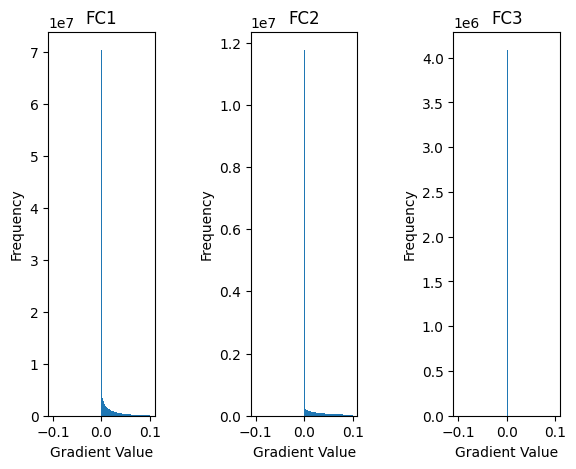

In [ ]:
# Assuming fc1_weights is already defined as in your previous code
plt.subplot(1, 3, 1)
plt.hist(fc1_gradients_magnitude.flatten(), bins=100, range=(-0.10, 0.10))
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.title("FC1")

# Assuming fc2_weights is already defined as in your previous code
plt.subplot(1, 3, 2)
plt.hist(fc2_gradients_magnitude.flatten(), bins=100, range=(-0.10, 0.10))
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.title("FC2")

# Assuming fc3_weights is already defined as in your previous code
plt.subplot(1, 3, 3)
plt.hist(fc3_gradients_magnitude.flatten(), bins=100, range=(-0.10, 0.10))
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.title("FC3")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.9,
                    hspace=0.9)
plt.show()

In [ ]:
gradient_distributions = [np.mean(fc1_gradients_magnitude),np.std(fc1_gradients_magnitude),np.mean(fc2_gradients_magnitude),np.std(fc2_gradients_magnitude),np.mean(fc3_gradients_magnitude),np.std(fc3_gradients_magnitude)]
print(gradient_distributions)

if not os.path.isdir('./output/'):
    os.makedirs('./output')

np.save("./output/vgg_gradient_distribution.npy", gradient_distributions)

[0.010485121, 0.029335896, 0.023292577, 0.062579095, 0.0043891706, 0.13215207]


# Graph for the three FC layers of VGG
### Build the nodes

In [ ]:
!pip install networkit
import networkit as nk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 1.1 MB/s eta 0:00:00


In [ ]:
# Get the number of neurons in each fully connected layer
num_neurons_input = fc1.in_features
num_neurons_fc1 = fc1.out_features
num_neurons_fc2 = fc2.out_features
num_neurons_fc3 = fc3.out_features

# Create an empty graph
graph = nk.Graph(num_neurons_input + num_neurons_fc1 + num_neurons_fc2 + num_neurons_fc3, weighted=True, directed=True)

#### Draw the edges

In [ ]:
for i in tqdm(range(num_neurons_input)):
    for j in range(num_neurons_fc1):
        graph.addEdge(i, num_neurons_input + j, fc1_weights[j, i])

100%|██████████| 25088/25088 [02:00<00:00, 208.54it/s]


In [ ]:
for i in tqdm(range(num_neurons_fc1)):
    for j in range(num_neurons_fc2):
        graph.addEdge(num_neurons_input + i, num_neurons_input + num_neurons_fc1 + j, fc2_weights[j,i])

100%|██████████| 4096/4096 [00:28<00:00, 143.87it/s]


In [ ]:
for i in tqdm(range(num_neurons_fc2)):
    for j in range(num_neurons_fc3):
        graph.addEdge(num_neurons_input + num_neurons_fc1 + i, num_neurons_input + num_neurons_fc1+ num_neurons_fc2 + j, fc3_weights[j,i])

100%|██████████| 4096/4096 [00:03<00:00, 1284.32it/s]


#Embedding Features

## Estimate Weighted Betweenness for nodes

In [ ]:
print(int(graph.numberOfNodes()*.35))

11998


In [ ]:
# Compute approximation of betweenness centrality
betweenness = nk.centrality.EstimateBetweenness(graph, int(graph.numberOfNodes()*.35), normalized=True, parallel=True)

betweenness.run()
betweenness_scores = betweenness.scores()

# Print or further process the betweenness centrality scores
print("Estimated Betweenness Centrality Scores:", betweenness_scores)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/vgg_betweennes.npy", betweenness_scores)

Estimated Betweenness Centrality Scores: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

## Compute weighted degree of nodes

In [ ]:
degrees = []

for i in tqdm(range(num_neurons_input + num_neurons_fc1 + num_neurons_fc2 + num_neurons_fc3)):
  degrees.append((abs(graph.weightedDegree(i))+abs(graph.weightedDegreeIn(i)))/(graph.degreeIn(i)+graph.degreeOut(i)))

print(degrees)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/vgg_weighted_degree.npy", degrees)

100%|██████████| 34280/34280 [00:02<00:00, 14674.55it/s]

[0.00014916585071023027, 0.0002651095288137076, 0.0002497430428347047, 0.00025377875981794085, 0.0002481213893989337, 0.00013527280762981597, 0.00012427262879065315, 1.1510595085223452e-05, 0.00023886170650300187, 0.0002665816290240014, 0.0002450879072917189, 0.00034609704921062523, 0.00018290401972650971, 7.578299527344345e-05, 9.44196981701173e-05, 0.0001875753103159905, 0.000310781932213372, 0.0002312574241926102, 0.00023422060569749936, 0.00023125505368312704, 8.057204467240564e-06, 5.457769950408496e-05, 0.00024964232173935175, 0.0002860590321855372, 0.0002861045777565324, 0.00018082884066453198, 0.0002929930377735257, 0.0001424738169233386, 7.447105684810218e-05, 8.297660582774063e-05, 0.00018425195003507477, 0.0002680581459160586, 0.00013330964073779428, 0.00022457809232889758, 6.76364469376356e-07, 0.00011033765470262746, 0.0001862929469469421, 0.00022772892013137036, 0.0002463834789482866, 0.00021112931764670495, 0.00016502668732110148, 4.803714946599591e-05, 0.000208129300498

In [ ]:
norm = np.linalg.norm(degrees)
if norm!=0:
  normalized_degrees = degrees/norm

print(normalized_degrees)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/vgg_normalized_degree.npy", normalized_degrees)

[0.00140616 0.00249914 0.00235428 ... 0.00915218 0.01471606 0.01606359]


## Compute weighted gradient for nodes

In [ ]:
weighted_node_gradients = []

for i in tqdm(range(num_neurons_input)):
    weighted_node_gradients.append(np.sum(np.abs(np.multiply(fc1_gradients_magnitude[:,i],fc1_weights[:,i]))))

for i in tqdm(range(num_neurons_fc1)):
    weighted_node_gradients.append(np.sum(np.abs(np.multiply(fc2_gradients_magnitude[:,i],fc2_weights[:,i]))))

for i in tqdm(range(num_neurons_fc2)):
    weighted_node_gradients.append(np.sum(np.abs(np.multiply(fc3_gradients_magnitude[:,i],fc3_weights[:,i]))))

for i in tqdm(range(num_neurons_fc3)):
    weighted_node_gradients.append(0.0)

print(weighted_node_gradients)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/vgg_weighted_gradient.npy", weighted_node_gradients)

100%|██████████| 1000/1000 [00:00<00:00, 1407484.56it/s]


[0.017645959, 0.012548061, 0.043802667, 0.025442014, 0.10918765, 0.1671012, 0.1897621, 0.052664623, 0.015611056, 0.0023291882, 0.0, 0.0, 0.047658693, 0.08908306, 0.0, 0.010960119, 0.0, 0.05494067, 0.031982355, 0.058312163, 0.03492748, 0.017700452, 0.026461381, 0.036113266, 0.035405822, 0.0, 0.14187738, 0.13931808, 0.017662382, 0.04328703, 0.032933127, 0.0, 0.05081857, 0.04282908, 0.05355501, 0.22978863, 0.05388014, 0.06924045, 0.053001426, 0.087981, 0.098994374, 0.15258667, 0.40113893, 0.14365235, 0.12603053, 0.09706614, 0.12694398, 0.07632645, 0.06461529, 0.12865068, 0.08520341, 0.121057376, 0.055750847, 0.0068431385, 0.06762566, 0.15065703, 0.13327372, 0.038610015, 0.04911053, 0.10098727, 0.09525304, 0.0793417, 0.2453892, 0.11630382, 0.04711233, 0.04977216, 0.16542783, 0.11403331, 0.04190618, 0.16220309, 0.10672636, 0.06587474, 0.10010589, 0.037574254, 0.004762096, 0.17142248, 0.30353314, 0.24478269, 0.23152658, 0.17178145, 0.1409703, 0.34210208, 0.3176117, 0.4068841, 0.47339347, 0.5

In [ ]:
norm = np.linalg.norm(weighted_node_gradients)
if norm!=0:
  normalized_weighted_node_gradients = weighted_node_gradients/norm

print(normalized_weighted_node_gradients)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/vgg_normalized_gradient.npy", normalized_weighted_node_gradients)

[0.0002148  0.00015275 0.0005332  ... 0.         0.         0.        ]


## Add embedding features to the graph

In [ ]:
node_betweenness = graph.attachNodeAttribute("betweenness", float)
node_degree = graph.attachNodeAttribute("degree", float)
node_gradient = graph.attachNodeAttribute("gradient", float)

In [ ]:
for i in range(num_neurons_input + num_neurons_fc1 + num_neurons_fc2 + num_neurons_fc3):
    node_betweenness[i]=betweenness_scores[i]
    node_degree[i]=normalized_degrees[i]
    node_gradient[i]=normalized_weighted_node_gradients[i]

## Save complete network to file

In [ ]:
if not os.path.isdir('./output/'):
    os.makedirs('./output')

nk.writeGraph(graph,"./output/vgg_FC_directed.nkbg003", nk.Format.NetworkitBinary, chunks=16, NetworkitBinaryWeights=2)

In [ ]:
del(graph)

# **Building graphs for paths computation**

 ## Building network with absolute value of weights for shortest path computation

In [ ]:
abs_graph = nk.Graph(num_neurons_input + num_neurons_fc1 + num_neurons_fc2 + num_neurons_fc3, weighted=True, directed=True)

# FC1
for i in tqdm(range(num_neurons_input)):
    for j in range(num_neurons_fc1):
        abs_graph.addEdge(i, num_neurons_input + j, abs(fc1_weights[j, i]))

# FC2
for i in tqdm(range(num_neurons_fc1)):
    for j in range(num_neurons_fc2):
        abs_graph.addEdge(num_neurons_input + i, num_neurons_input + num_neurons_fc1 + j, abs(fc2_weights[j,i]))

# FC3
for i in tqdm(range(num_neurons_fc2)):
    for j in range(num_neurons_fc3):
        abs_graph.addEdge(num_neurons_input + num_neurons_fc1 + i, num_neurons_input + num_neurons_fc1+ num_neurons_fc2 + j, abs(fc3_weights[j,i]))

100%|██████████| 4096/4096 [00:04<00:00, 850.65it/s] 


## Shortest Paths computation

In [ ]:
shortest_paths_distances = []   # Store distances separately
shortest_paths_nodes = []       # Store paths (nodes) separately

heuristic = [0 for _ in range(abs_graph.upperNodeIdBound())]

for i in tqdm(range(0,num_neurons_input)):
    # print("searching for node",i)
    min_distance = float('inf')
    min_path = []
    dijkstra = nk.distance.Dijkstra(abs_graph, source=i, storePaths=True)
    dijkstra.run()

    for j in range(num_neurons_input + num_neurons_fc1 + num_neurons_fc2, num_neurons_input + num_neurons_fc1+ num_neurons_fc2 + num_neurons_fc3):
        # print("To node",j)
        if (dijkstra.distance(j)<min_distance):
            min_distance = dijkstra.distance(j)
            min_path = dijkstra.getPath(j)

    #print("[",min_distance,",",min_path,"]")
    shortest_paths_distances.append(min_distance)
    shortest_paths_nodes.append(min_path)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/vgg_shortest_paths_distances.npy", shortest_paths_distances)
np.save("./output/vgg_shortest_paths_nodes.npy", shortest_paths_nodes)

100%|██████████| 25088/25088 [1:08:05<00:00,  6.14it/s]


In [ ]:
del(abs_graph)
del(shortest_paths_distances)
del(shortest_paths_nodes)
del(dijkstra)

## Inverting weights to find longest paths

In [ ]:
abs_graph = nk.Graph(num_neurons_input + num_neurons_fc1 + num_neurons_fc2 + num_neurons_fc3, weighted=True, directed=True)

# FC1
for i in tqdm(range(num_neurons_input)):
    for j in range(num_neurons_fc1):
        abs_graph.addEdge(i, num_neurons_input + j, -abs(fc1_weights[j, i]))

# FC2
for i in tqdm(range(num_neurons_fc1)):
    for j in range(num_neurons_fc2):
        abs_graph.addEdge(num_neurons_input + i, num_neurons_input + num_neurons_fc1 + j, -abs(fc2_weights[j,i]))

# FC3
for i in tqdm(range(num_neurons_fc2)):
    for j in range(num_neurons_fc3):
        abs_graph.addEdge(num_neurons_input + num_neurons_fc1 + i, num_neurons_input + num_neurons_fc1+ num_neurons_fc2 + j, -abs(fc3_weights[j,i]))

100%|██████████| 4096/4096 [00:03<00:00, 1082.40it/s]


## Finding longest_paths

In [ ]:
longest_paths_distances = []   # Store distances separately
longest_paths_nodes = []       # Store paths (nodes) separately

heuristic = [0 for _ in range(abs_graph.upperNodeIdBound())]

for i in tqdm(range(0,num_neurons_input)):
    # print("searching for node",i)
    min_distance = float('-inf')
    min_path = []
    dijkstra = nk.distance.Dijkstra(abs_graph, source=i, storePaths=True)
    dijkstra.run()

    for j in range(num_neurons_input + num_neurons_fc1+ num_neurons_fc2, num_neurons_input + num_neurons_fc1+ num_neurons_fc2 + num_neurons_fc3):
        # print("To node",j)
        if (dijkstra.distance(j)>min_distance):
            min_distance = dijkstra.distance(j)
            min_path = dijkstra.getPath(j)

    #print("[",-min_distance,",",min_path,"]")
    longest_paths_distances.append(-min_distance)
    longest_paths_nodes.append(min_path)


if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/vgg_longest_paths_distances.npy", longest_paths_distances)
np.save("./output/vgg_longest_paths_nodes.npy", longest_paths_nodes)

100%|██████████| 25088/25088 [2:04:29<00:00,  3.36it/s]


In [ ]:
del(abs_graph)
del(longest_paths_distances)
del(longest_paths_nodes)
del(dijkstra)

# Compress Output Folder

In [ ]:
!zip -r /content/VGG_Results.zip /content/output

  adding: content/output/ (stored 0%)
  adding: content/output/vgg_gradient_distribution.npy (deflated 39%)
  adding: content/output/vgg_weighted_degree.npy (deflated 11%)
  adding: content/output/vgg_normalized_degree.npy (deflated 6%)
  adding: content/output/vgg_longest_paths_nodes.npy (deflated 83%)
  adding: content/output/vgg_shortest_paths_nodes.npy (deflated 78%)
  adding: content/output/vgg_dimensions.npy (deflated 55%)
  adding: content/output/vgg_weights_distribution.npy (deflated 38%)
  adding: content/output/vgg_longest_paths_distances.npy (deflated 49%)
  adding: content/output/vgg_FC_directed.nkbg003 (deflated 32%)
  adding: content/output/vgg_weighted_gradient.npy (deflated 53%)
  adding: content/output/vgg_shortest_paths_distances.npy (deflated 41%)
  adding: content/output/vgg_betweennes.npy (deflated 77%)
  adding: content/output/vgg_normalized_gradient.npy (deflated 18%)
